🧪 EDA Guide for Text and Time Series Data

✅ 1. Headline Length Statistics

 Exploratory Data Analysis (EDA) on Financial News and Stock Price Integration Dataset (FNSPID), ’ll want to explore both the text data (news headlines) and the time series data (stock prices/dates).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
import warnings
from wordcloud import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')
print(df.info())
print(df.head())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://w

In [31]:
# Calculate headline lengths
df['headline_length'] = df['headline'].astype(str).apply(len)

# Descriptive statistics
print("Headline Length Stats:")
print(df['headline_length'].describe())


Headline Length Stats:
count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


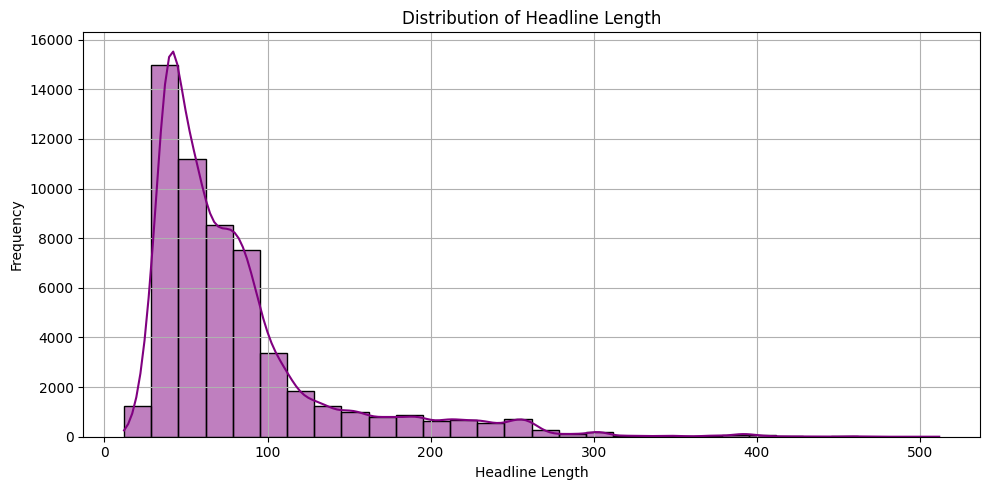

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(df['headline_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Headline Length')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
publisher_counts = df['publisher'].value_counts()

print("Top Publishers by Number of Articles:")
print(publisher_counts.head(10))


Top Publishers by Number of Articles:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


📅 Datetime Parsing & Sorting

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
df = df.sort_values('date')

📈  Time Series Analysis: Articles Over Time

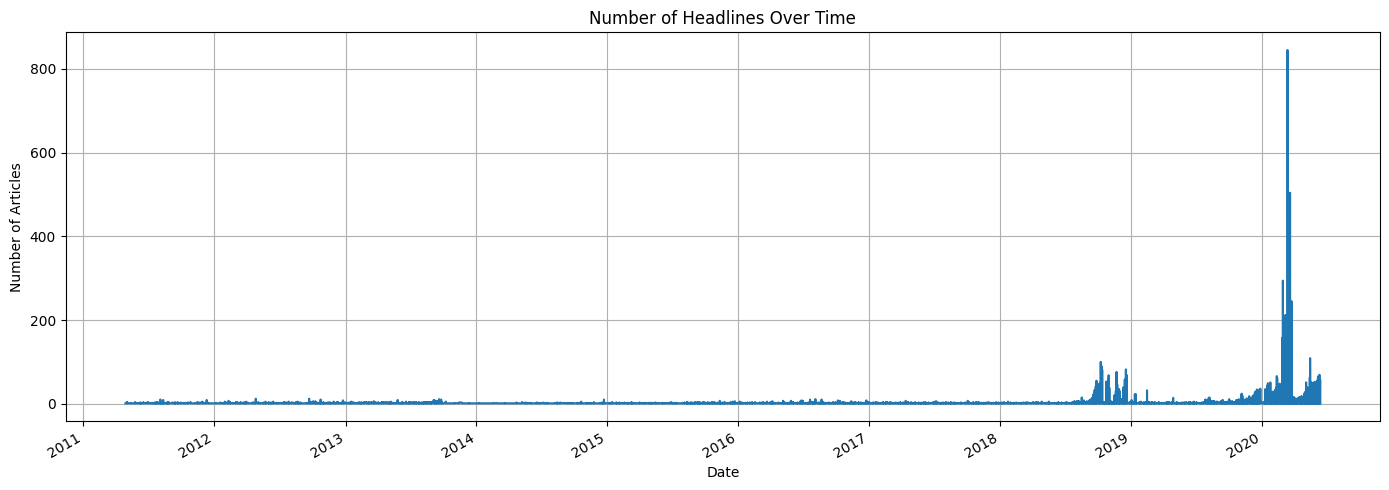

In [9]:
daily_counts = df['date'].value_counts().sort_index()
plt.figure(figsize=(14, 5))
daily_counts.plot()
plt.title("Number of Headlines Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

Weekly Trend (Smoothed):

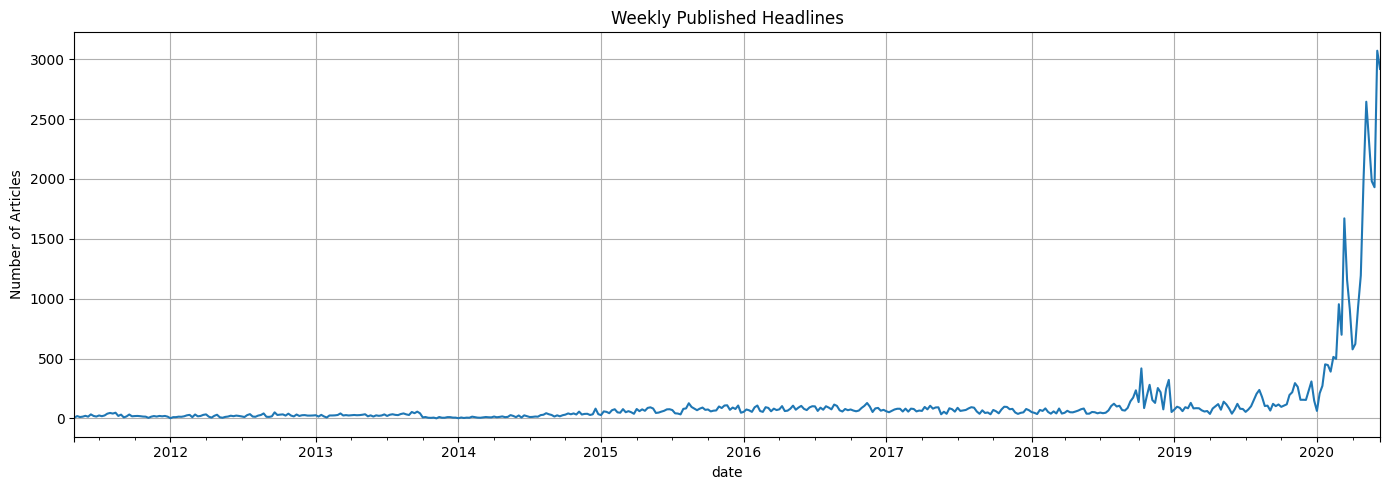

In [10]:
weekly_counts = df.set_index('date').resample('W').count()['headline']
weekly_counts.plot(figsize=(14, 5), title='Weekly Published Headlines')
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

Plot the monthly trend

In [13]:
monthly_counts = df.set_index('date').resample('M').count()['headline']


C:\Users\USED\AppData\Local\Temp\ipykernel_23240\2543375466.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.set_index('date').resample('M').count()['headline']


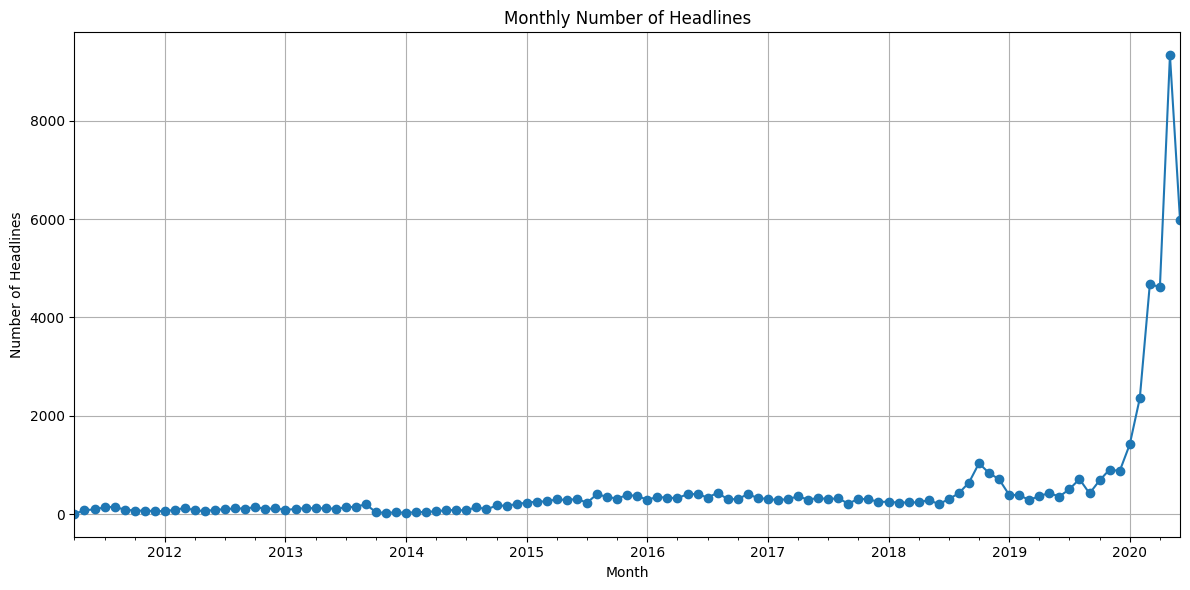

In [14]:
plt.figure(figsize=(12, 6))
monthly_counts.plot(marker='o')
plt.title("Monthly Number of Headlines")
plt.xlabel("Month")
plt.ylabel("Number of Headlines")
plt.grid(True)
plt.tight_layout()
plt.show()

✍️  Text Data EDA: Headlines

In [15]:
# Text features
df['headline_length'] = df['headline'].astype(str).apply(len)
df['word_count'] = df['headline'].astype(str).apply(lambda x: len(x.split()))

Headline Length Distribution

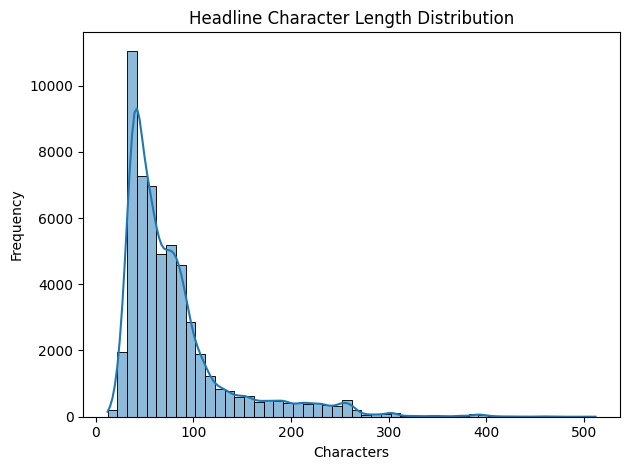

In [16]:
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title("Headline Character Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Word Count Distribution

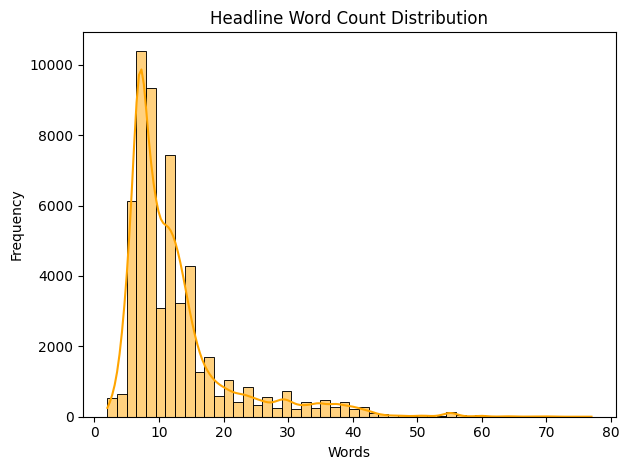

In [17]:
sns.histplot(df['word_count'], bins=50, kde=True, color='orange')
plt.title("Headline Word Count Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Text Visualization: Word Cloud

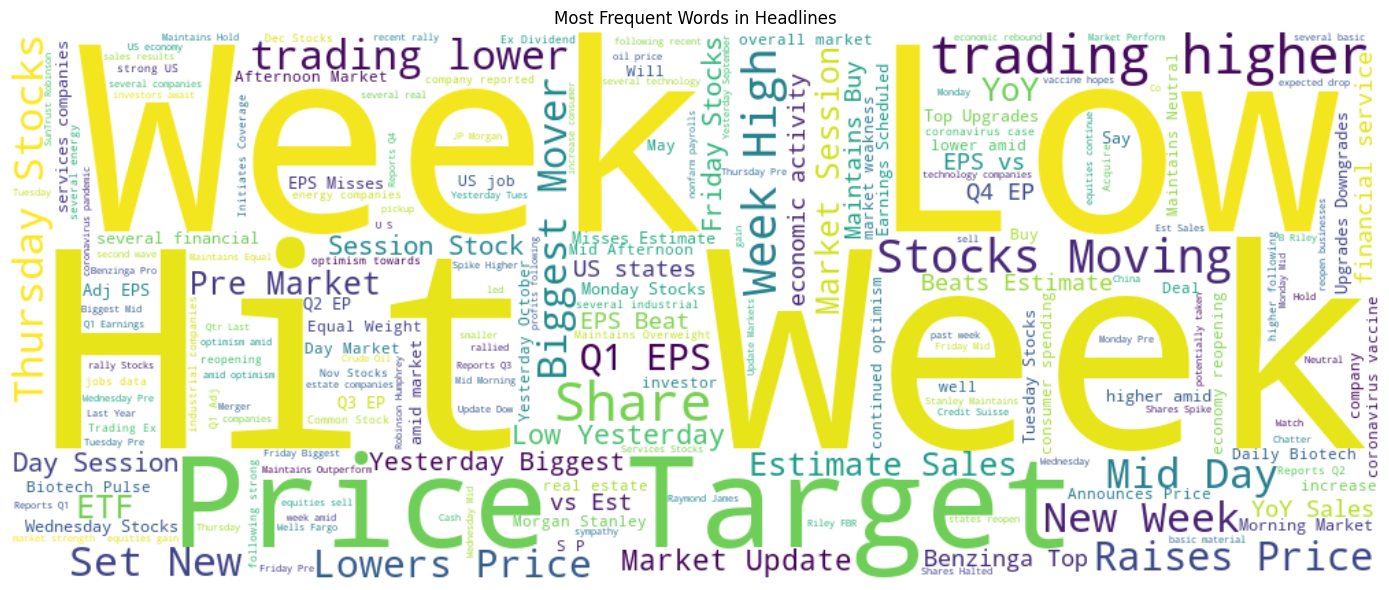

In [ ]:
text = ' '.join(df['headline'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(text)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Headlines")
plt.tight_layout()
plt.show()

🔠 Top Terms, Publishers, and Symbols

In [22]:
print("Top Stock Symbols:")
print(df['stock'].value_counts().head(10))

print("\nTop Publishers:")
print(df['publisher'].value_counts().head(10))

print("\nTop Words in Headlines:")
from collections import Counter
import re

words = re.findall(r'\b\w+\b', text.lower())
common_words = Counter(words).most_common(20)
print(common_words)

Top Stock Symbols:
stock
GRUB    10
TSLA    10
FIVE    10
DEJ     10
CRIS    10
GDL     10
HTZ     10
UAL     10
CHS     10
USO     10
Name: count, dtype: int64

Top Publishers:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64

Top Words in Headlines:
[('to', 15964), ('on', 13725), ('of', 13345), ('stocks', 12794), ('the', 11289), ('in', 11179), ('0', 9901), ('week', 9029), ('52', 8453), ('s', 8405), ('shares', 8393), ('for', 8376), ('from', 7400), ('that', 6800), ('trading', 6575), ('and', 6253), ('are', 6214), ('hit', 5902), ('a', 5598), ('eps', 5531)]


Clean Text (for deeper NLP later)

 Identify Top 3 Publishers

In [25]:
top_publishers = df['publisher'].value_counts().head(3).index.tolist()
print("Top 3 publishers:", top_publishers)
#Filter Dataset for Top 3 Publishers
df_top_publishers = df[df['publisher'].isin(top_publishers)]


Top 3 publishers: ['Benzinga Newsdesk', 'Lisa Levin', 'ETF Professor']


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df_top_publishers['sentiment'] = df_top_publishers['headline'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])


C:\Users\USED\AppData\Local\Temp\ipykernel_23240\3926727784.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_publishers['sentiment'] = df_top_publishers['headline'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [28]:
# Categorize sentiment
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_top_publishers['sentiment_label'] = df_top_publishers['sentiment'].apply(label_sentiment)

# Count distribution
sentiment_dist = df_top_publishers['sentiment_label'].value_counts(normalize=True) * 100
print(sentiment_dist)


sentiment_label
Neutral     48.873731
Negative    27.887056
Positive    23.239213
Name: proportion, dtype: float64


C:\Users\USED\AppData\Local\Temp\ipykernel_23240\4054578828.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_publishers['sentiment_label'] = df_top_publishers['sentiment'].apply(label_sentiment)


C:\Users\USED\AppData\Local\Temp\ipykernel_23240\2512990684.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


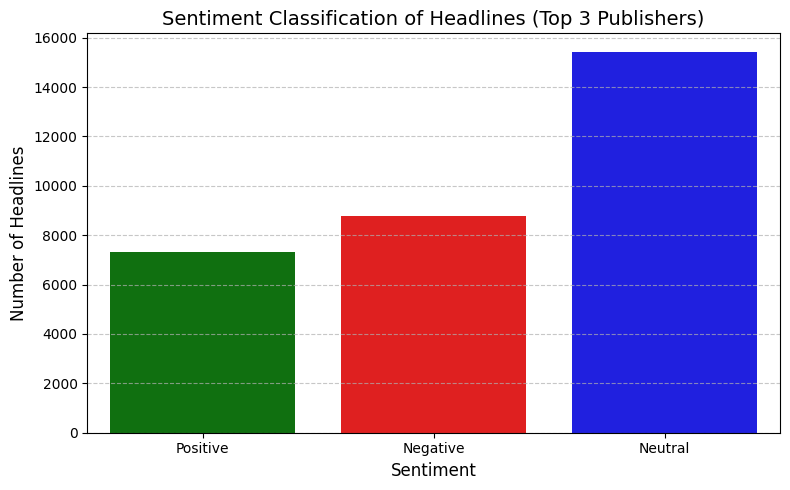

In [30]:
# Reorder sentiment categories
sentiment_order = ['Positive', 'Negative', 'Neutral']

# Define custom colors
custom_palette = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'blue'
}

# Plot with custom colors
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_top_publishers,
    x='sentiment_label',
    order=sentiment_order,
    palette=custom_palette
)

plt.title('Sentiment Classification of Headlines (Top 3 Publishers)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\USED\AppData\Local\Temp\ipykernel_23240\3415693175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')


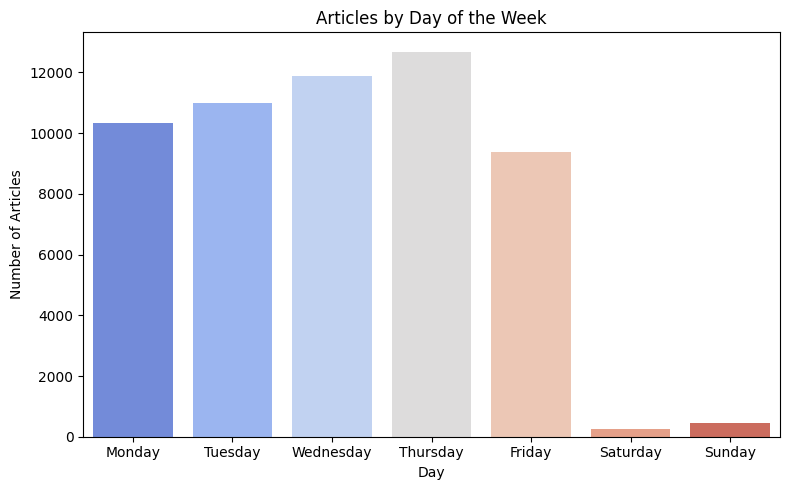

In [34]:
df['day_of_week'] = df['date'].dt.day_name()
day_counts = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')
plt.title('Articles by Day of the Week')
plt.ylabel('Number of Articles')
plt.xlabel('Day')
plt.tight_layout()
plt.show()

C:\Users\USED\AppData\Local\Temp\ipykernel_23240\993743771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_publishers.index, x=top_publishers.values, palette='viridis')


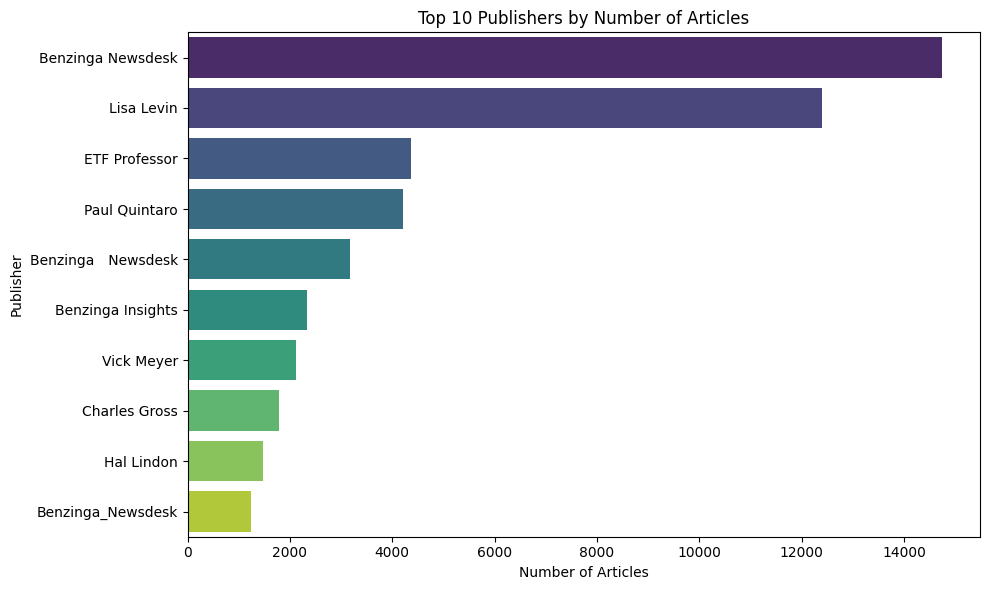

In [36]:
top_publishers = publisher_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette='viridis')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()